In [1]:
import sys,os
os.environ['pRT_input_data_path'] = '/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/'
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
from petitRADTRANS.retrieval.util import *
import petitRADTRANS.retrieval.plot_style as ps
from glob import glob
import scicomap as sc
matplotlib.rcParams['axes.linewidth'] = 2
import json

Initiating species v0.5.5... [DONE]
A new version (0.6.0) is available!
Want to stay informed about updates?
Please have a look at the Github page:
https://github.com/tomasstolker/species
Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Grid interpolation method: linear
Using pRT Plotting style!


In [3]:
data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/"
full_list = glob(data_dir + "b_full/out_PMN/*post_equal_weights*")
free_list = glob(data_dir + "b_free/out_PMN/*post_equal_weights*")

params = {}
samples = {}
names = []
for f in full_list:
    short = f.split("post")[0]
    name = short.split("/")[-1]
    pars = json.load(open(short+'params.json'))
    samp = np.genfromtxt(f)
    if len(samp.shape) != 2:
        continue
    names.append(name)
    params[name] = pars
    samples[name] = samp
for f in free_list:
    short = f.split("post")[0]
    name = short.split("/")[-1]
    pars = json.load(open(short+'params.json'))
    samp = np.genfromtxt(f)
    if len(samp.shape) != 2:
        continue
    if not "correctos" in name:
        continue
    names.append(name)
    params[name] = pars
    samples[name] = samp
coinds = {}
for key,val in params.items():
    if "Fe/H" in val:
        coinds[key] = val.index("C/O") 
    continue
    coinds[key] = (val.index("CO_all_iso_HITEMP"),val.index("H2O_Exomol"))

print(params)
print(coinds)

#samples = [sorted(np.random.choice(d[coinds[i]],5000)) for i,d in enumerate(data)]
#samplesfe = [sorted(np.random.choice(d[feinds[i]],5000)) for i,d in enumerate(data)]

#samples = np.array(samples)
#samplesfe = np.array(samplesfe)

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'HR8799b_23_v02_diseq_all_scaleos_eqFeMgCloud_': ['log_g', 'R_pl', 'T_int', 'T3', 'T2', 'T1', 'alpha', 'log_delta', 'log_pquench', 'Fe/H', 'C/O', 'sigma_lnorm', 'log_kzz', 'fsed', 'OSIRIS2011_scale_factor', 'eq_scaling_Fe(c)', 'eq_scaling_MgSiO3(c)'], 'HR8799b_23_v02_diseq_all_scaleos_eqMgCloud_': ['log_g', 'R_pl', 'T_int', 'T3', 'T2', 'T1', 'alpha', 'log_delta', 'log_pquench', 'Fe/H', 'C/O', 'sigma_lnorm', 'log_kzz', 'fsed', 'OSIRIS2011_scale_factor', 'eq_scaling_MgSiO3(c)'], 'HR8799b_23_v02_diseq_all_scaleos_eqFeMgCloud_mrprior_': ['mass', 'R_pl', 'T_int', 'T3', 'T2', 'T1', 'alpha', 'log_delta', 'log_pquench', 'Fe/H', 'C/O', 'sigma_lnorm', 'log_kzz', 'fsed', 'OSIRIS2011_scale_factor', 'eq_scaling_Fe(c)', 'eq_scaling_MgSiO3(c)'], 'HR8799b_23_v02_diseq_all_scaleos_clear_': ['log_g', 'R_pl', 'T_int', 'T3', 'T2', 'T1', 'alpha', 'log_delta', 'log_pquench', 'Fe/H', 'C/O', 'OSIRIS2011_scale_factor'], 'HR8799b_23_v02_diseq_all_scaleos_eqFeCloud_': ['log_g', 'R_pl', 'T_int', 'T3', 'T2', 'T1'

In [4]:
#freechem = np.genfromtxt(data_dir + "HR8799e_2022red_v08_free_PMN"  + "_post_equal_weights.dat").T
#cotemp = freechem[10][~np.isnan(freechem[10])]
#h2otemp = freechem[9][~np.isnan(freechem[10])]
co_ratios = {}

for key, val in samples.items():
    if "Fe/H" in params[key]:
        co_ratios[key] = val[:,coinds[key]]
    continue
    co = 10**val[:,coinds[key][0]]
    h2o = 10**val[:,coinds[key][1]]
    h2 = 0.73 * (1.0-(co + h2o))
    he = 0.24 * (1.0-(co + h2o))
    abunds = {"CO_all_iso": co, "H2O": h2o, "H2": h2, "He":he}
    nfracs = mass_to_number(abunds)
    freeco = nfracs["CO_all_iso"]/(nfracs["CO_all_iso"]+ nfracs["H2O"])
    co_ratios[key] = freeco
#samples.append(sorted(np.random.choice(freeco,2000)))
#samples = np.array(samples)
data = []
for key, val in co_ratios.items():
    data.append(val)
data = np.array(data)
print(data.shape)

(5,)


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (19).

<Figure size 432x288 with 0 Axes>

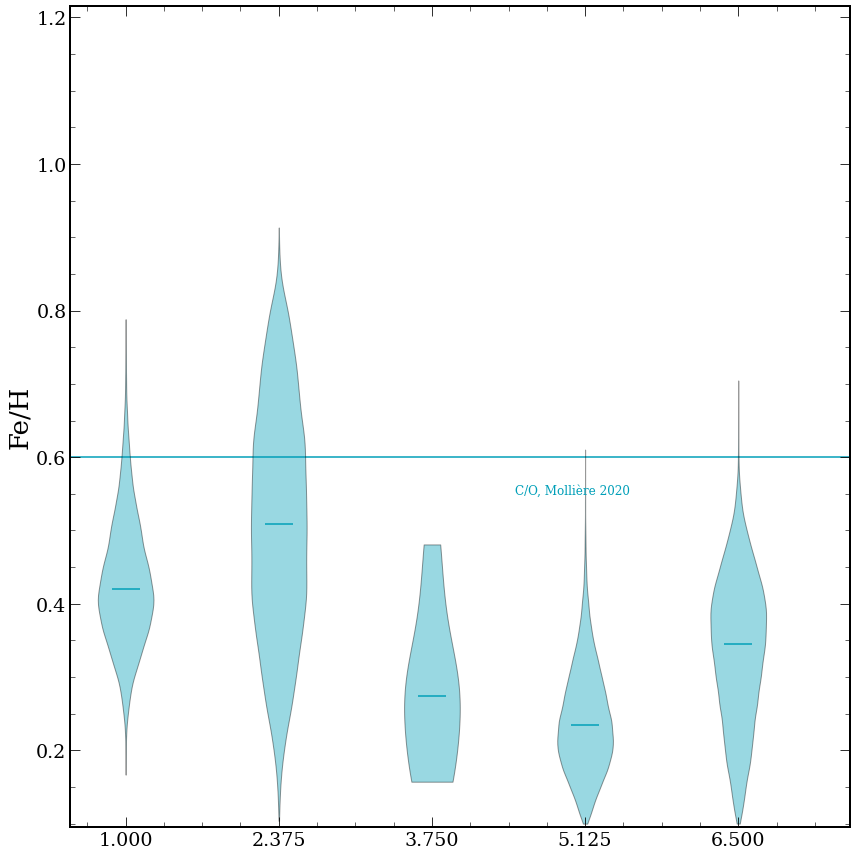

In [5]:

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='in')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels, rotation = 30)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Retrieval Name')
    
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value
plt.clf()

fig, ax = plt.subplots(figsize = (12,12))
ax.set_xlim(0.5,1.1*len(data)+2)
ax.set_ylim(0.095, 1.215)


ax.axhline(0.6, zorder = -1, color = ps.prt_colours[0])
ax.annotate("C/O, Mollière 2020", (0.9*len(data),0.55),fontsize = 12, color = ps.prt_colours[0])
print(len(data))

parts = ax.violinplot(data, 
                      showmedians=True, 
                      quantiles = None,
                      showextrema=False,
                      positions = np.linspace(1,1.1*len(data)+1,len(data)))

for pc in parts['bodies']:
    pc.set_facecolor(ps.prt_colours[0])
    pc.set_edgecolor('k')
    pc.set_alpha(0.4)

ax.set_ylabel("Fe/H")
ax.set_yticks( [0.2,0.4,0.6,0.8,1.0,1.2])
ax.set_yticklabels(labels =  [0.2,0.4,0.6,0.8,1.0,1.2])

ax.set_xticks(np.linspace(1,1.1*len(data)+1,len(data)))
ax.set_xticklabels(names, rotation = 90, fontsize = 12)

plt.savefig("plots/FeHviolinplote_HR8799b.pdf",bbox_inches='tight')


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


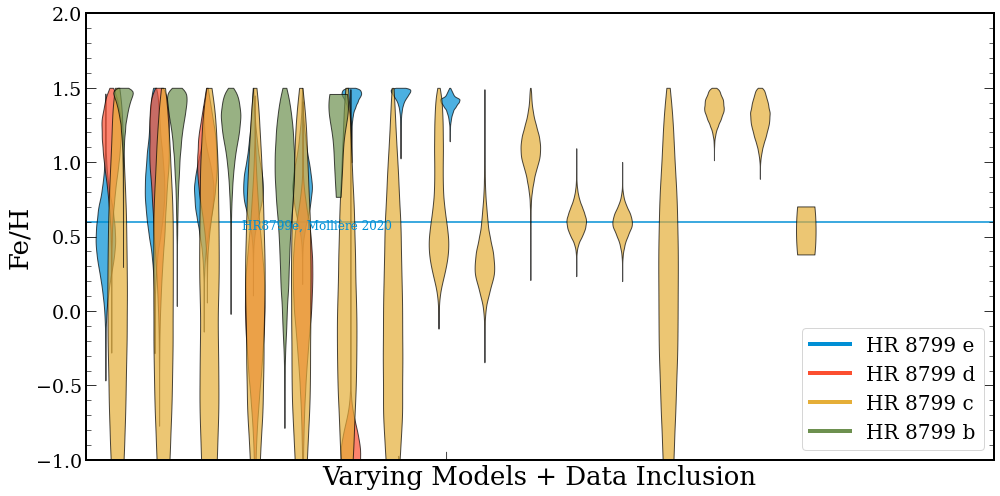

In [8]:
data_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/"

planets = ["e","d","c","b"]
qual_map = sc.ScicoQualitative(cmap='538')
fixed_cmap = qual_map.get_mpl_color_map()
colour_dict = {"b":fixed_cmap(3/6),
              "c":fixed_cmap(2/6),
              "d":fixed_cmap(1/6),
              "e":fixed_cmap(0/6)}
fig, ax = plt.subplots(figsize = (14,7))

for count,planet in enumerate(planets):
    full_list = glob(f"{data_dir}{planet}_full/out_PMN/*post_equal_weights*")
    free_list = glob(f"{data_dir}{planet}_free/out_PMN/*post_equal_weights*")

    spectra = {}
    params = {}
    samples = {}
    names = []
    for f in full_list:
        short = f.split("post")[0]
        name = short.split("/")[-1]
        pars = json.load(open(short+'params.json'))
        samp = np.genfromtxt(f)
        if len(samp.shape) != 2:
            continue
        names.append(name)
        params[name] = pars
        samples[name] = samp
    for f in free_list:
        short = f.split("post")[0]
        name = short.split("/")[-1]
        pars = json.load(open(short+'params.json'))
        samp = np.genfromtxt(f)
        if len(samp.shape) != 2:
            continue
        if planet =="b" and not "correctos" in name:
            continue
        names.append(name)
        params[name] = pars
        samples[name] = samp
    coinds = {}
    for key,val in params.items():
        if "Fe/H" in val:
            coinds[key] = val.index("Fe/H") 
        continue
        coinds[key] = (val.index("CO_all_iso_HITEMP"),val.index("H2O_Exomol"))
    co_ratios = {}

    likes = []
    for key, val in samples.items():
        if "Fe/H" in params[key]:
            likes.append(np.min(val[:,-1]))
            co_ratios[key] = val[:,coinds[key]]
        continue
        co = 10**val[:,coinds[key][0]]
        h2o = 10**val[:,coinds[key][1]]
        h2 = 0.73 * (1.0-(co + h2o))
        he = 0.24 * (1.0-(co + h2o))
        abunds = {"CO_all_iso": co, "H2O": h2o, "H2": h2, "He":he}
        nfracs = mass_to_number(abunds)
        freeco = nfracs["CO_all_iso"]/(nfracs["CO_all_iso"]+ nfracs["H2O"])
        co_ratios[key] = freeco
    #samples.append(sorted(np.random.choice(freeco,2000)))
    #samples = np.array(samples)
    data = []
    meds = []

    for key, val in co_ratios.items():
        meds.append(np.median(val))
        data.append(val)
    data = np.array(data)
    meds = np.array(meds)
    parts = ax.violinplot(data[np.argsort(likes)], 
                        showmedians=False, 
                        quantiles = None,
                        showextrema=False,
                        positions = np.linspace(1,1.1*len(data)+1,len(data)) + (0.15*count))

    for pc in parts['bodies']:
        pc.set_facecolor(colour_dict[planet])
        pc.set_edgecolor('k')
        pc.set_alpha(0.7)

custom_lines = [Line2D([0], [0], color=colour_dict["e"], lw=4),
                Line2D([0], [0], color=colour_dict["d"], lw=4),
                Line2D([0], [0], color=colour_dict["c"], lw=4),
                Line2D([0], [0], color=colour_dict["b"], lw=4)]
ax.legend(custom_lines, ['HR 8799 e', 'HR 8799 d', 'HR 8799 c','HR 8799 b'],loc = 'lower right')

ax.axhline(0.6, zorder = -1, color = colour_dict["e"])
ax.annotate("HR8799e, Mollière 2020", (0.9*len(data),0.55),fontsize = 12, color = colour_dict["e"])

ax.set_xlim(0.5,23.7)
ax.set_ylim(-1.0, 2.0)
ax.set_ylabel("Fe/H")
#ax.set_yticks( [0.2,0.4,0.6,0.8,1.0])
#ax.set_yticklabels(labels = [0.2,0.4,0.6,0.8,1.0])

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel("Varying Models + Data Inclusion")
plt.savefig("plots/FeHviolinplotAll_likesort.pdf",bbox_inches='tight')


In [98]:
print(likes)

[8496.225937831878, 8507.218262917168, 10000.453260450542, 8452.237092781674, 8465.35049120677, 10010.201679159003, 9918.461258343561, 10078.06022131906, 10014.215308936331, 9924.51762108438, 10020.663090900052, 9988.706304253177, 10035.686701746876, 9945.561534392138, 9910.157712853463, 10004.341040801577, 9913.39071138026, 9988.884203136828, 10012.917246175946]


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
